In [1]:
import yfinance as yf

tickers = [
    "AXON", "BA", "GD", "NEM", "FNV", "GOLD", "BAC", "JPM", "BMO", "GS", "MS", "SCHW", "NVO", "REGN", "VRTX",
    "ANET", "DELL", "HP", "IAU", "URE", "ELD", "SSD", "UFPI", "WFG", "BKNG", "ABNB", "RCL", "NVDA", "TSM", "AVGO"
]

start_date = '2020-01-01'
end_date = '2022-12-31'

# Create a dataframe to store the data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']


[*********************100%***********************]  30 of 30 completed


In [3]:
# Calculate daily returns
daily_returns = data.pct_change()


In [4]:
# Calculate mean, maximum, and minimum return:
mean_daily_returns = daily_returns.mean()
max_daily_returns = daily_returns.max()
min_daily_returns = daily_returns.min()


In [5]:
# Calculate Exponentially Weighted Moving Average (EWMA):
ewma = daily_returns.ewm(span=21).mean()


In [6]:
# Calculate standard deviations (risk):
standard_deviations = daily_returns.std()


In [11]:
# Add the index 'SPY' to the tickers list
tickers.append('SPY')

# Download the data again with the updated tickers list
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Recalculate daily returns
daily_returns = data.pct_change()

# Now calculate Beta for each stock vs. the index (SPY)
cov_matrix = daily_returns.cov()
spy_var = daily_returns['SPY'].var()
betas = cov_matrix['SPY'] / spy_var

cov_matrix = daily_returns.cov()
spy_var = daily_returns['SPY'].var()
betas = cov_matrix['SPY'] / spy_var



[*********************100%***********************]  31 of 31 completed


In [13]:
#Calculate Beta for each stock vs. the index (SPY in this case):
import numpy as np

cov_matrix = daily_returns.cov()
spy_var = daily_returns['SPY'].var()
betas = cov_matrix['SPY'] / spy_var


In [14]:
# Calculate Sharpe Ratios:

risk_free_rate = 0.02  # Assuming a 2% annual risk-free rate
annualized_returns = ((1 + daily_returns.mean()) ** 252) - 1
annualized_std = daily_returns.std() * np.sqrt(252)
sharpe_ratios = (annualized_returns - risk_free_rate) / annualized_std


In [37]:
# Create three portfolios by filtering stocks based on their risk level (standard deviation):
low_risk_stocks = standard_deviations.nsmallest(10).index
medium_risk_stocks = standard_deviations.nsmallest(20).index.difference(low_risk_stocks)
high_risk_stocks = standard_deviations.index.difference(low_risk_stocks.union(medium_risk_stocks))

portfolio_low_risk = data[low_risk_stocks]
portfolio_medium_risk = data[medium_risk_stocks]
portfolio_high_risk = data[high_risk_stocks]

# We will use the 3 portfolios based on risk
selected_portfolios = [portfolio_low_risk, portfolio_medium_risk, portfolio_high_risk]



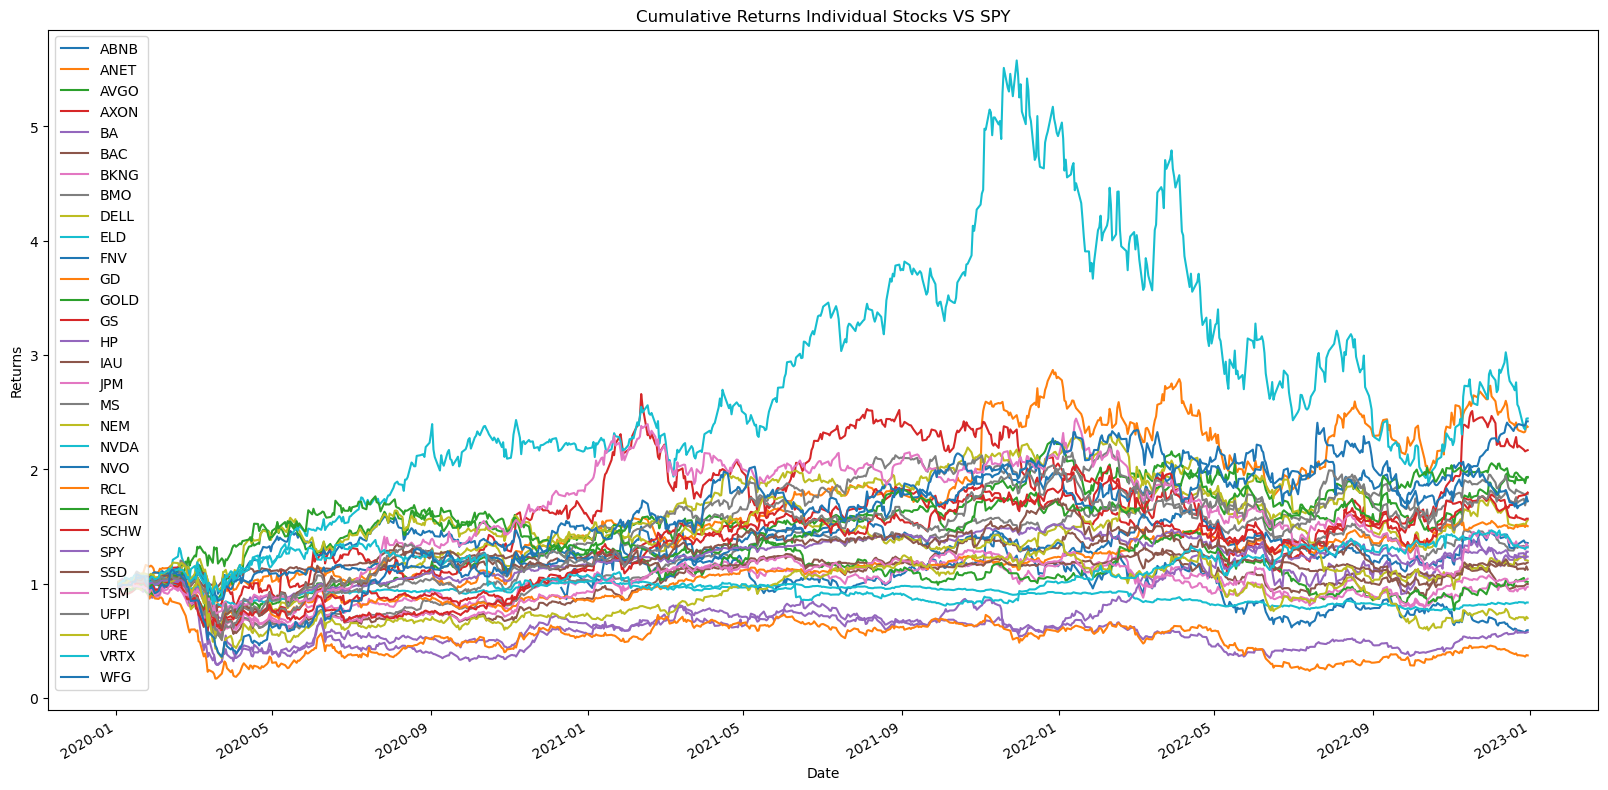

In [24]:
import matplotlib.pyplot as plt

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()

# Cumulative Returns Plot:
cumulative_returns.plot(figsize=(20, 10))
plt.title("Cumulative Returns Individual Stocks VS SPY")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend(loc="best")
plt.show()



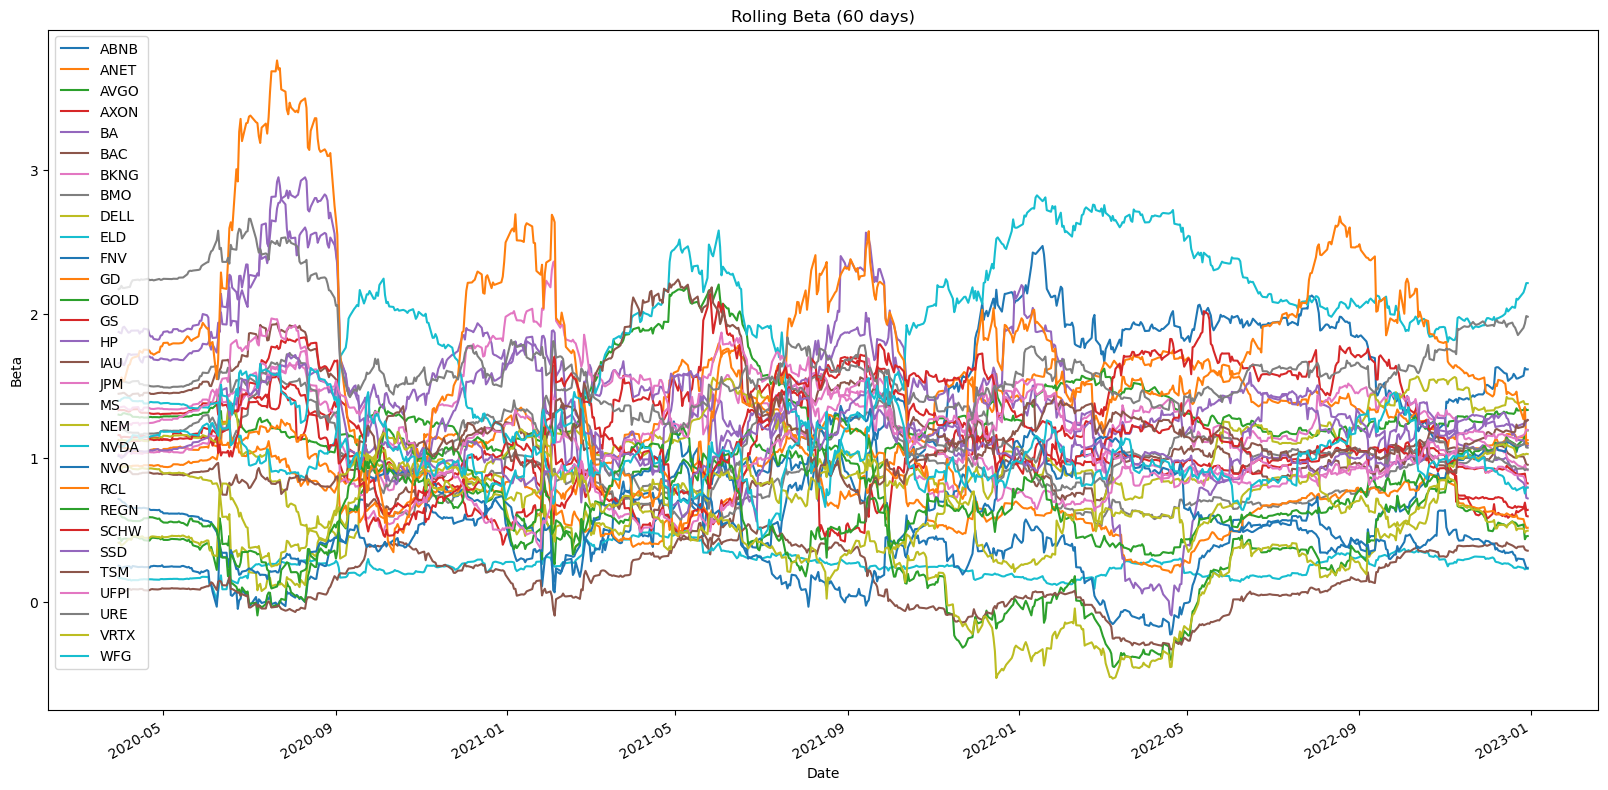

In [26]:
import pandas as pd

# Calculate the rolling covariance between each stock and the benchmark (SPY), then divide by the rolling variance of the benchmark (SPY)
rolling_window = 60
rolling_covariance = daily_returns.rolling(window=rolling_window).cov(daily_returns['SPY'])
rolling_variance_spy = daily_returns['SPY'].rolling(window=rolling_window).var()

# New DataFrame with the same structure as the daily_returns DataFrame to store the rolling beta for each stock.
rolling_beta = pd.DataFrame(index=daily_returns.index, columns=daily_returns.columns)

# Calculate the rolling beta by dividing the rolling covariance by the rolling variance of the benchmark for each stock.
for stock in tickers:
    rolling_beta[stock] = rolling_covariance[stock] / rolling_variance_spy

# Plot the rolling beta values.
rolling_beta.drop(columns=['SPY'], inplace=True)
rolling_beta.plot(figsize=(20, 10))
plt.title("Rolling Beta (60 days)")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.legend(loc="best")
plt.show()


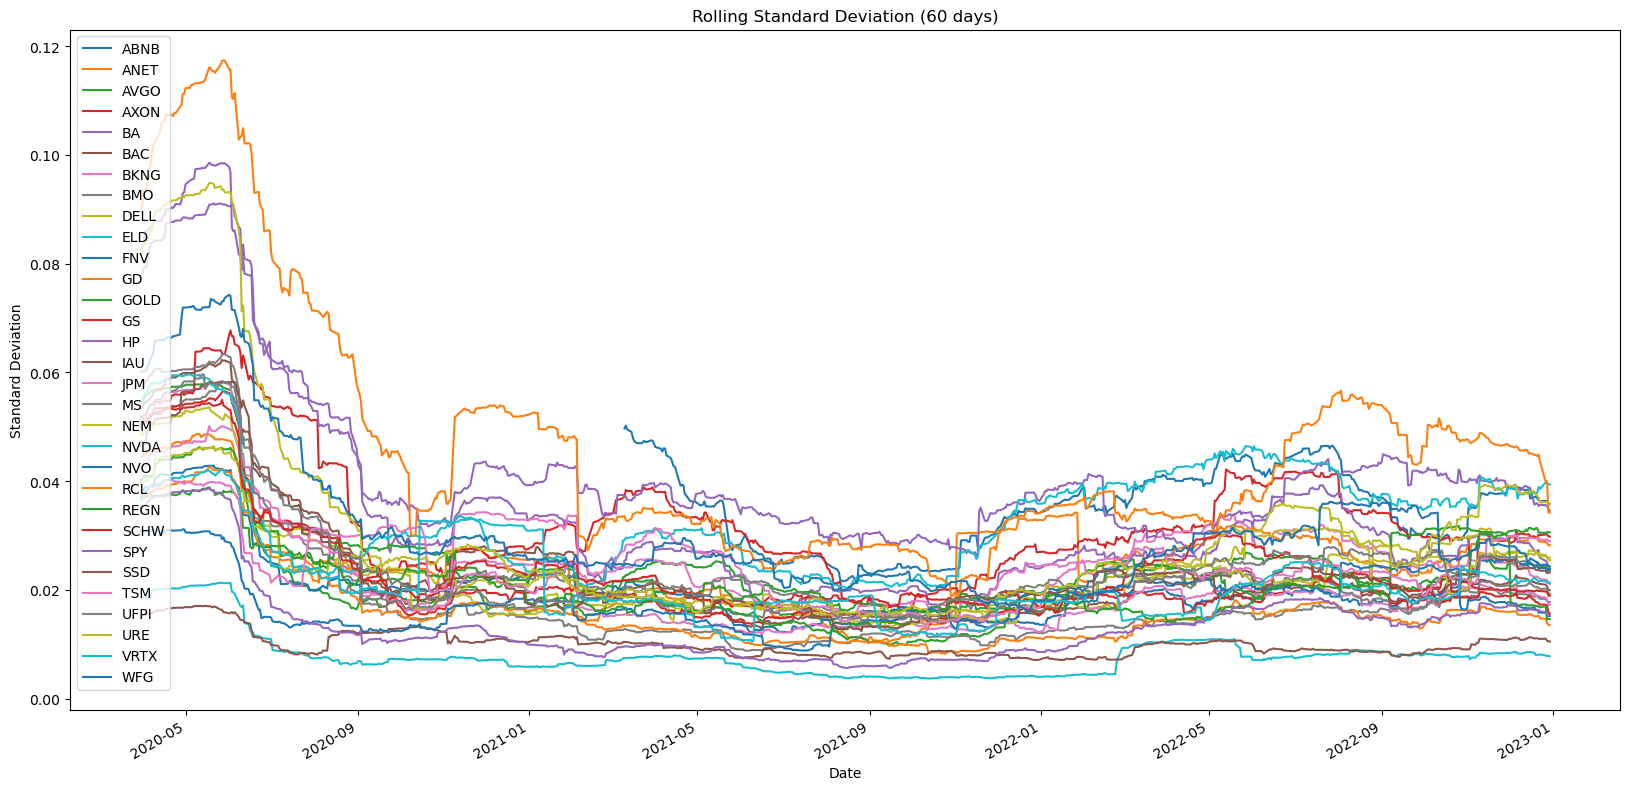

In [28]:
# Rolling Standard Deviation Plot
rolling_std = daily_returns.rolling(window=rolling_window).std()
rolling_std.plot(figsize=(20, 10))
plt.title("Rolling Standard Deviation (60 days)")
plt.xlabel("Date")
plt.ylabel("Standard Deviation")
plt.legend(loc="best")
plt.show()


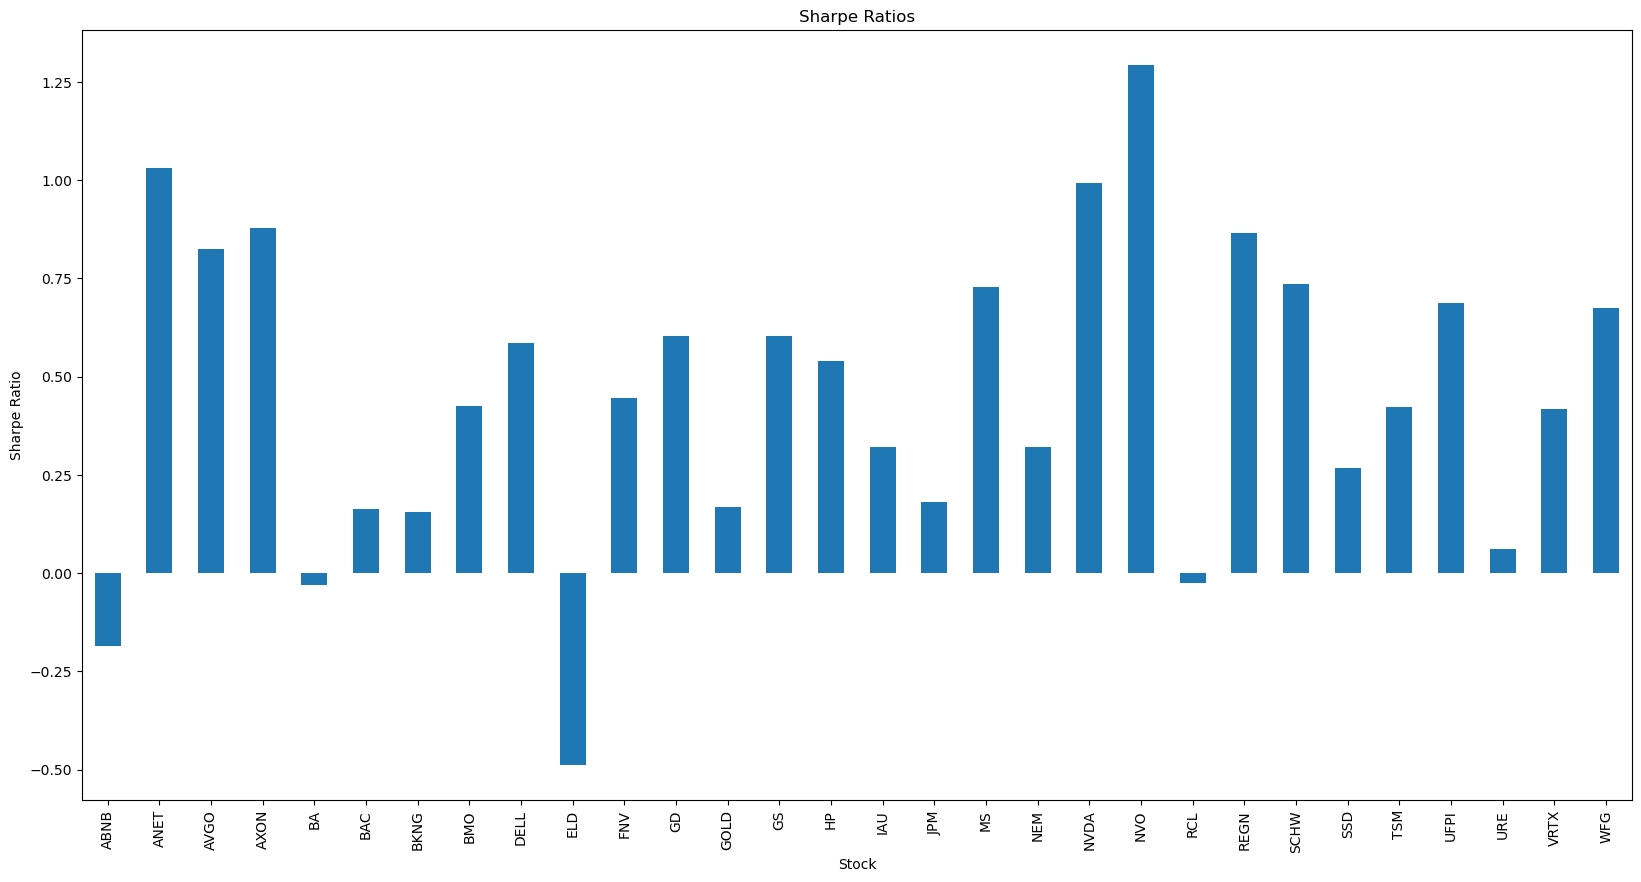

In [29]:
# Sharpe Ratios Bar Plot:
sharpe_ratios.drop('SPY').plot(kind='bar', figsize=(20, 10))
plt.title("Sharpe Ratios")
plt.xlabel("Stock")
plt.ylabel("Sharpe Ratio")
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


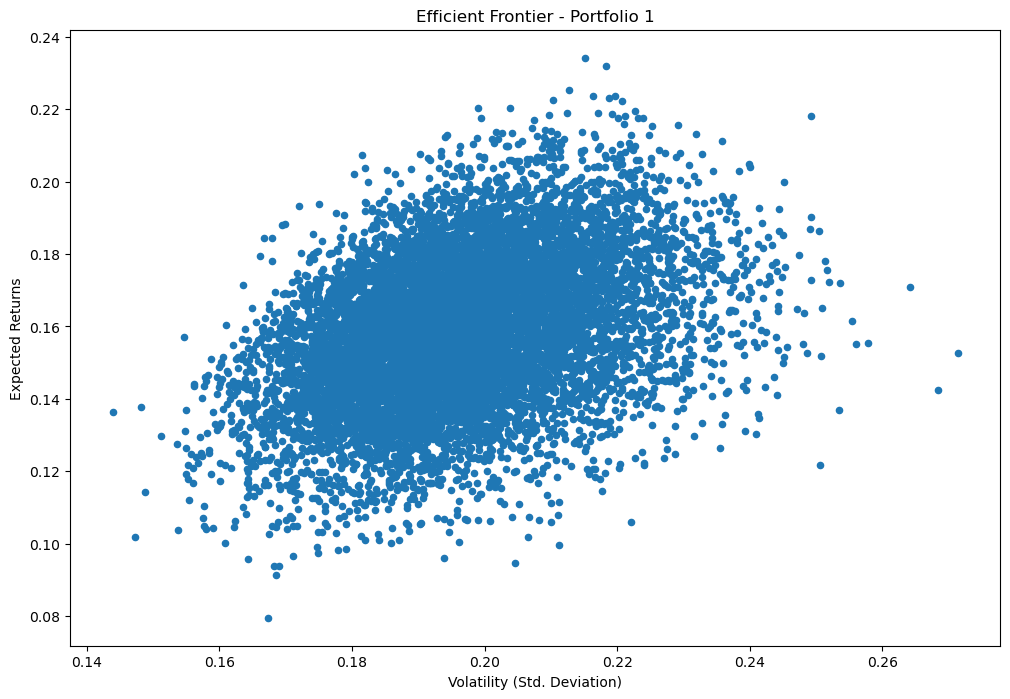

/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


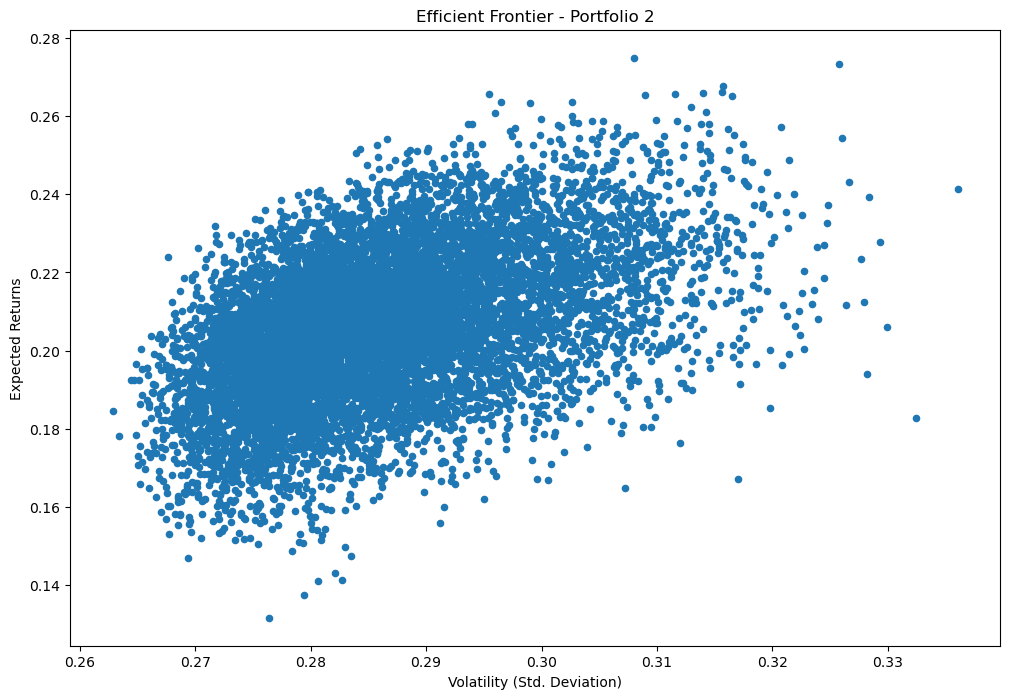

/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


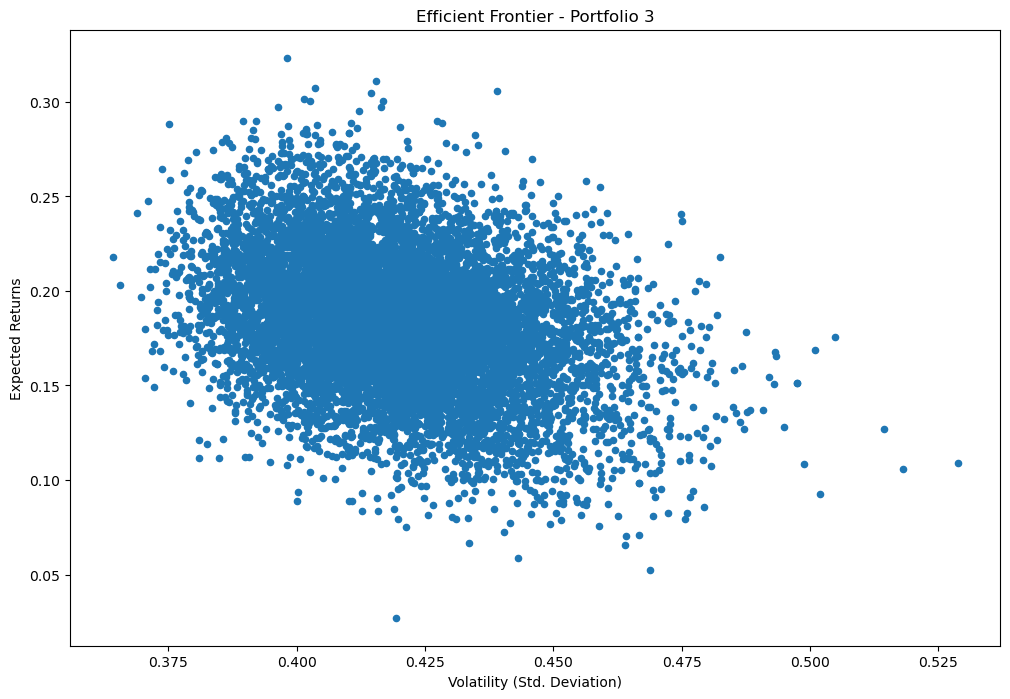

Portfolio 1 = Low Risk, Portfolio 2 = Medium Risk, Portfolio 3 = High Risk


In [42]:
import numpy as np

# Create three portfolios by filtering stocks based on their risk level (standard deviation):
low_risk_stocks = standard_deviations.nsmallest(10).index
medium_risk_stocks = standard_deviations.nsmallest(20).index.difference(low_risk_stocks)
high_risk_stocks = standard_deviations.index.difference(low_risk_stocks.union(medium_risk_stocks))

portfolio_low_risk = data[low_risk_stocks]
portfolio_medium_risk = data[medium_risk_stocks]
portfolio_high_risk = data[high_risk_stocks]

# We will use the 3 portfolios based on risk
selected_tickers = [low_risk_stocks, medium_risk_stocks, high_risk_stocks]

for j, risk_tickers in enumerate(selected_tickers):
    mean_returns_no_benchmark = mean_returns[risk_tickers]
    cov_matrix = daily_returns[risk_tickers].cov()

    num_portfolios = 10000
    results = np.zeros((num_portfolios, 2))

    for i in range(num_portfolios):
        weights = np.random.random(len(risk_tickers))
        weights /= np.sum(weights)

        returns = np.dot(weights, mean_returns_no_benchmark.values) * num_trading_days
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix.values, weights))) * np.sqrt(num_trading_days)

        results[i] = [returns, volatility]

    portfolio_simulation = pd.DataFrame(results, columns=["Returns", "Volatility"])
    portfolio_simulation.plot.scatter(x="Volatility", y="Returns", figsize=(12, 8))
    plt.title(f"Efficient Frontier - Portfolio {j+1}")
    plt.xlabel("Volatility (Std. Deviation)")
    plt.ylabel("Expected Returns")
    plt.show()

print("Portfolio 1 = Low Risk, Portfolio 2 = Medium Risk, Portfolio 3 = High Risk")
